In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
from scipy.optimize import minimize
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
ind =erk.get_ind_returns()
er=erk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

In [39]:
def msr(riskfree_rate,er,cov):
    """
    RiskFree rate+ER+COV->W 
    """
    n=er.shape[0]
    init_guess=np.repeat(1/n,n)
    bounds=((0.0,1.0),)*n
    
    weights_sum_to_1= {
        'type':'eq',
        'fun':lambda weights:np.sum(weights)-1
        
    }
    
    def neg_sharpe_ratio(weights,riskfree_rate,er,cov):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r=erk.portfolio_return(weights,er)
        vol=erk.portfolio_vol(weights,cov)
        return -(r-riskfree_rate)/vol
    
    results=minimize(neg_sharpe_ratio, init_guess,
                    args=(riskfree_rate,er,cov,),method='SLSQP',
                    options={'disp':False},
                    constraints=(weights_sum_to_1),
                    bounds=bounds
                    )
    
    return results.x

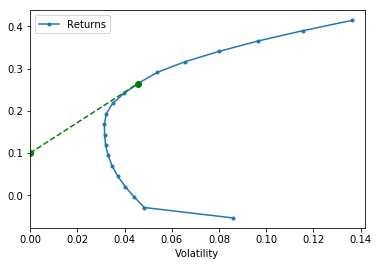

In [40]:
ax=erk.plot_ef(20,er,cov)
ax.set_xlim(left=0)
rf=0.1
w_msr=msr(rf,er,cov)
r_msr=erk.portfolio_return(w_msr,er)
vol_msr=erk.portfolio_vol(w_msr,cov)
#Add CML

cml_x=[0,vol_msr]
cml_y=[rf,r_msr ]
ax.plot(cml_x,cml_y, color="green",marker="o",linestyle="dashed")

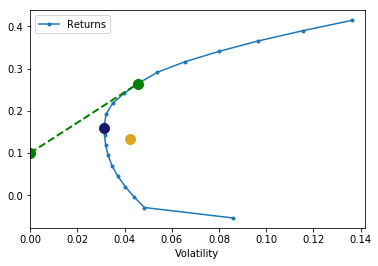

In [41]:
erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.1,show_ew=True,show_gmv=True)

# Lack of Robustness of the Markwitz Procedure, and the GMV

In [42]:
l=["Food","Steel"]
erk.msr(0.1,er[l],cov.loc[l,l])

array([0.75040363, 0.24959637])

In [43]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [44]:
erk.msr(0.1,np.array([.11,.12]),cov.loc[l,l])

array([0.57930354, 0.42069646])

In [45]:
erk.msr(0.1,np.array([.10,.13]),cov.loc[l,l])

array([0., 1.])

In [46]:
erk.msr(0.1,np.array([.13,.10]),cov.loc[l,l])

array([1., 0.])

In [50]:
erk.gmv(cov)*100

array([3.13254167e+00, 9.53125825e-11, 8.37378998e-01, 2.38181902e-01,
       3.03526090e-12, 7.82312967e+00, 1.55052932e-10, 6.48765396e+00,
       6.59368717e-12, 5.15147987e-13, 2.10482399e-10, 1.01850992e-12,
       5.53049873e-13, 1.49601064e-10, 1.43964090e-10, 1.20209209e-10,
       4.61151859e-12, 1.29137045e-12, 3.30213045e-12, 4.82924056e+01,
       3.15167064e+00, 1.77688352e-11, 1.01321297e+01, 5.14678142e-12,
       2.48831936e-11, 2.46036922e-11, 8.38588766e+00, 1.15190202e+01,
       3.71552154e-10, 2.04232328e-10])